<a href="https://colab.research.google.com/github/himanshu1729ch/Detecting-Early-Alzheimer/blob/main/Python%20Code%20Final%20Project%20Handling%20Imbalanced%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early Detection of Alzheimer Disease 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the CSV file in the 'originaldataset'.
originaldataset=pd.read_csv("Alz mmse Dataset.csv")

In [3]:
#checking the loaded dataset
originaldataset.head()

,Subject,IntraCranialVol,CortexVol,TotalGrayVol,CorticalWhiteMatterVol,TOTAL_HIPPOCAMPUS_VOLUME,mmse,Group,cdr,apoe,Age,Education,Race,M/F
0,OAS30001,1136503.981,379446.1801,517683.1801,367262.9335,7678.9,29,NormalCognition,0.0,23.0,65.50,12.0,Caucasian,F
1,OAS30002,1727245.999,471180.9506,628934.9506,511207.5550,8860.3,29,NormalCognition,0.0,34.0,68.99,18.0,Caucasian,M
2,OAS30003,1449811.052,421337.4069,569622.4069,455826.0555,8448.5,30,NormalCognition,0.0,33.0,60.30,16.0,Caucasian,F
3,OAS30004,1441778.886,436061.6281,585563.6281,472832.0577,8636.3,30,NormalCognition,0.0,23.0,58.11,17.0,Caucasian,F
4,OAS30005,1606336.367,472022.8105,670640.2598,509406.4844,9073.5,27,NormalCognition,0.0,33.0,48.42,16.0,Asian,F


In [4]:
#Dropping Subject column as it have id which of no use going further
originaldataset.drop('Subject', axis='columns', inplace=True)

In [5]:
#taking 10 random observations form dataset to see the changes
originaldataset.sample(10)

,IntraCranialVol,CortexVol,TotalGrayVol,CorticalWhiteMatterVol,TOTAL_HIPPOCAMPUS_VOLUME,mmse,Group,cdr,apoe,Age,Education,Race,M/F
573,1502586.196,399581.9580,555880.9580,429133.9094,7528.6,29,NormalCognition,0.0,34.0,74.66,16.0,Caucasian,M
258,1655927.616,481873.1819,639112.1819,549189.3826,8914.5,30,NormalCognition,0.0,33.0,47.43,16.0,Caucasian,M
864,1399230.305,365130.4910,506122.4910,378663.6277,6003.4,15,ModerateDementia,2.0,44.0,68.23,14.0,African American,M
711,1668307.309,436917.0241,594471.0241,415496.6934,5870.5,29,NormalCognition,0.5,33.0,82.34,16.0,Caucasian,M
473,1360631.411,443496.4416,590260.4416,455211.0167,9154.8,30,NormalCognition,0.0,34.0,65.80,16.0,Caucasian,F
644,1567061.092,438905.1512,587041.1512,431664.7079,7570.0,28,NormalCognition,0.0,33.0,75.23,13.0,Caucasian,F
484,1671414.840,458298.2875,617793.2875,454500.5586,8210.2,28,NormalCognition,0.0,34.0,66.35,18.0,Caucasian,M
699,1318519.349,423063.5361,570944.5361,416675.5634,7538.3,30,NormalCognition,0.0,34.0,62.95,18.0,Caucasian,M
177,1440124.233,424909.0273,560088.0273,398196.7206,7434.8,30,NormalCognition,0.0,23.0,73.16,20.0,Caucasian,M
443,1743858.582,472922.6969,631085.6969,538005.5279,6935.7,30,NormalCognition,0.0,23.0,70.81,16.0,Caucasian,M


In [6]:
#changing all column names to lowercase
originaldataset.columns=originaldataset.columns.str.lower()

In [7]:
#datatypes of columns
originaldataset.dtypes

intracranialvol             float64
cortexvol                   float64
totalgrayvol                float64
corticalwhitemattervol      float64
total_hippocampus_volume    float64
mmse                          int64
group                        object
cdr                         float64
apoe                        float64
age                         float64
education                   float64
race                         object
m/f                          object
dtype: object

In [8]:
#checking the information about the dataset
originaldataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   intracranialvol           1026 non-null   float64
 1   cortexvol                 1026 non-null   float64
 2   totalgrayvol              1026 non-null   float64
 3   corticalwhitemattervol    1026 non-null   float64
 4   total_hippocampus_volume  1026 non-null   float64
 5   mmse                      1026 non-null   int64  
 6   group                     1026 non-null   object 
 7   cdr                       1026 non-null   float64
 8   apoe                      1004 non-null   float64
 9   age                       1026 non-null   float64
 10  education                 1024 non-null   float64
 11  race                      1026 non-null   object 
 12  m/f                       1026 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 104.3+ KB


In [9]:
#above we have 13 columns other than index

In [10]:
#checking the nulls
originaldataset.isna().sum() 

intracranialvol              0
cortexvol                    0
totalgrayvol                 0
corticalwhitemattervol       0
total_hippocampus_volume     0
mmse                         0
group                        0
cdr                          0
apoe                        22
age                          0
education                    2
race                         0
m/f                          0
dtype: int64

## Imputation

In [11]:
#filling out the missing values by most frequent values in the columns
from sklearn.impute import SimpleImputer

imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

In [12]:
imputer.fit(originaldataset[['apoe']])
originaldataset[['apoe']] = imputer.fit_transform(originaldataset[['apoe']])

In [13]:
imputer.fit(originaldataset[['education']])
originaldataset[['education']] = imputer.fit_transform(originaldataset[['education']])

In [14]:
# Check missing values by each column
pd.isnull(originaldataset).sum() 

intracranialvol             0
cortexvol                   0
totalgrayvol                0
corticalwhitemattervol      0
total_hippocampus_volume    0
mmse                        0
group                       0
cdr                         0
apoe                        0
age                         0
education                   0
race                        0
m/f                         0
dtype: int64

### About Target Column "Group"

In [15]:
#checking out our target column and its unique value
#The MMSE has a maximum score of 30 points. The scores are generally grouped as follows:
"""
25-30 points	Normal Cognition
21-24 points	Mild dementia
10-20 points	Moderate dementia
9 points or lower	Severe dementia
"""
pd.unique(originaldataset['group'])


array(['NormalCognition', 'ModerateDementia', 'MildDementia',
       'SevereDementia'], dtype=object)

In [16]:
originaldataset['group'].value_counts()

NormalCognition     836
ModerateDementia     92
MildDementia         84
SevereDementia       14
Name: group, dtype: int64

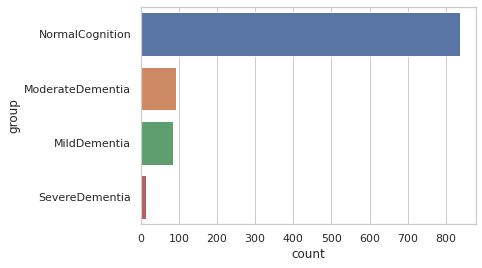

In [17]:
sns.set_theme(style="whitegrid")
#visualising frequncies of each group
sns.countplot(y=originaldataset['group'])

### As the data is highly imbalanced in 4 classes with lots of subject falling in Normal Cognition class as expected.
I am now converting this multiclass problem to a binary problem as the subjects who are in category of 'NormalCognition' be NonDemented means not seem to have any Alzheimer on diagnosis and the other group is the subject having 'MildDementia', 'ModerateDementia', 'SevereDementia' as Demented Class.


In [18]:
originaldataset['group'].replace({'NormalCognition': 'NonDemented', 'MildDementia': 'Demented','ModerateDementia': 'Demented','SevereDementia': 'Demented'}, inplace=True)

## Now we have two classes - Demented and NonDemented

In [19]:
originaldataset['group'].value_counts()

NonDemented    836
Demented       190
Name: group, dtype: int64

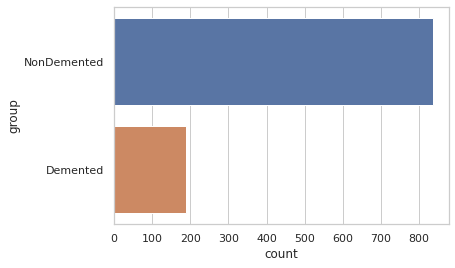

In [20]:
sns.countplot(y=originaldataset['group'])

# EXPLORATORY DATA ANALYSIS (EDA)

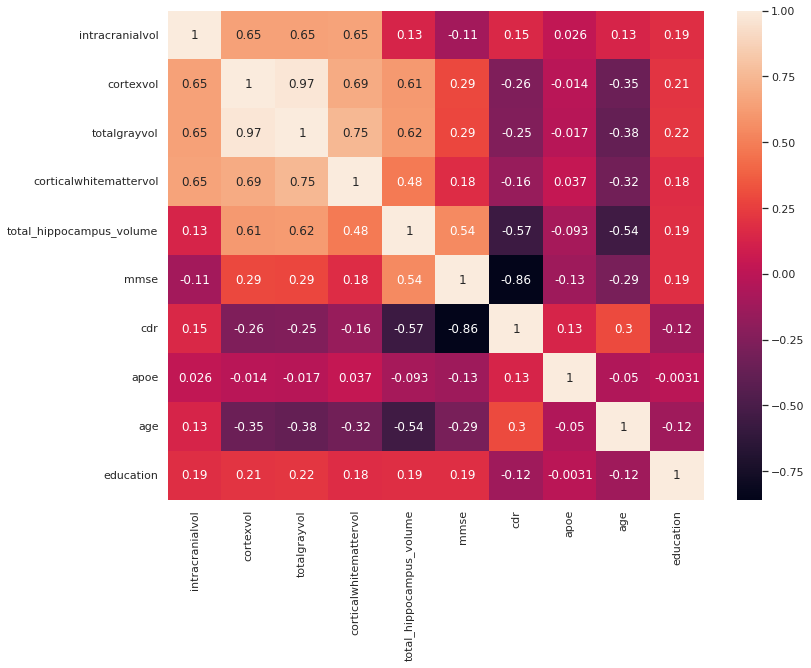

In [21]:
#checking correlations with heatmap.
cor = originaldataset.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cor, xticklabels=cor.columns.values,yticklabels=cor.columns.values, annot=True)
plt.show()

In [22]:
# Above we can check the correlation of every column against MMSE, The TOTAL HIPPOCAMPUS VOLUME seems most positive coorelated
#AND CDR seems highly negatively correlated.

In [23]:
#before moving on further changing the name of dataset from 'originaldataset' to 'df'.
df=originaldataset

In [24]:
# bar drawing function
def bar_chart(feature):
    NonDemented = df[df['group']=="NonDemented"][feature].value_counts()
    Demented = df[df['group']=="Demented"][feature].value_counts()
    df_bar = pd.DataFrame([NonDemented,Demented])
    df_bar.index = ['NonDemented','Demented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and MMSE')

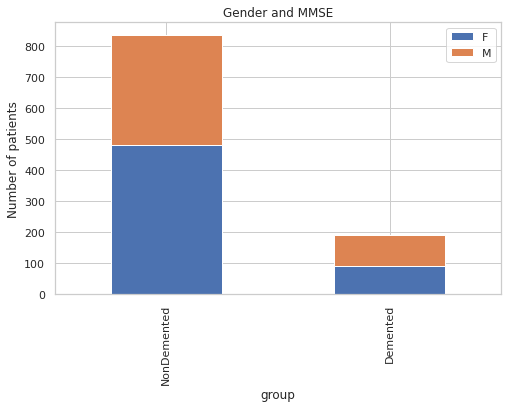

In [25]:
# Gender(M/F)  and  Group ( Female=0, Male=1)
bar_chart('m/f')
plt.xlabel('group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and MMSE')

#below generally we can see that male proportion are having less MMSE values.

In [26]:
#Counts of values of each kind in Group
originaldataset['group'].value_counts()

NonDemented    836
Demented       190
Name: group, dtype: int64

(0.3, 30.0)

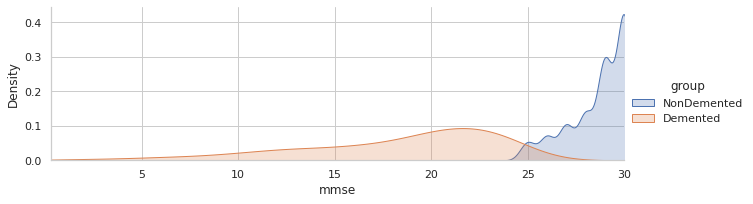

In [27]:
#MMSE : Mini Mental State Examination
facet= sns.FacetGrid(df,hue="group", aspect=3)
facet.map(sns.kdeplot,'mmse',shade= True)
facet.set(xlim=(0, df['mmse'].max()))
facet.add_legend()
plt.xlim(0.30)

#we can see how the range of each group is distributed. 

(50.0, 100.0)

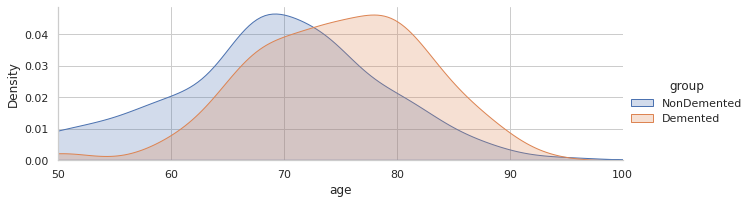

In [29]:
#AGE
facet= sns.FacetGrid(df,hue="group", aspect=3)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, df['age'].max()))
facet.add_legend()
plt.xlim(50,100)

#below we can observe that age 70-85, more people are having dementia than any other age group.

(0.0, 0.2)

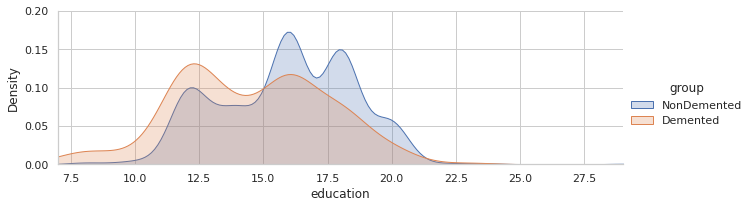

In [30]:
#'EDUC' = Years of Education

facet= sns.FacetGrid(df,hue="group", aspect=3)
facet.map(sns.kdeplot,'education',shade= True)
facet.set(xlim=(df['education'].min(), df['education'].max()))
facet.add_legend()
plt.ylim(0, 0.2)

#below, we can observe the mix trends but by correlation as well as some trend we see that the dementia decreasae with education level.

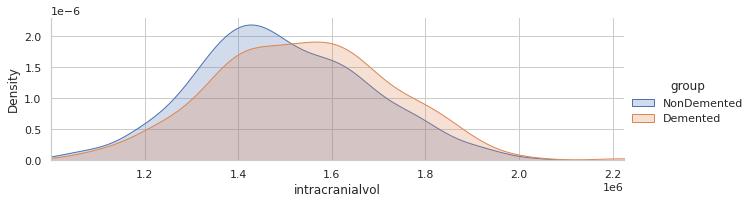

In [31]:
#'IntraCranialVol' 
facet= sns.FacetGrid(df,hue="group", aspect=3)
facet.map(sns.kdeplot,'intracranialvol',shade= True)
facet.set(xlim=(df['intracranialvol'].min(), df['intracranialvol'].max()))
facet.add_legend()

#by seeing the heat map correlation and the below graph as dementia increases the IntraCranial Volume increases.
#demetia increase, MMSE decrease therefore IntraCranialVol increase according to correlation.

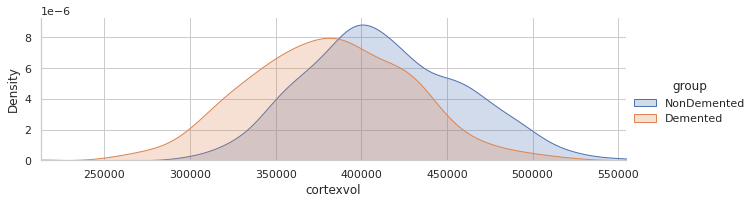

In [32]:
#'CortexVol' 

facet= sns.FacetGrid(df,hue="group", aspect=3)
facet.map(sns.kdeplot,'cortexvol',shade= True)
facet.set(xlim=(df['cortexvol'].min(), df['cortexvol'].max()))
facet.add_legend()

#below, demented people are having less cortex volume than normal one.

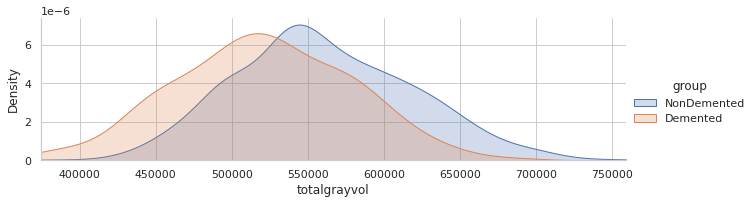

In [33]:
#'TotalGrayVol'
facet= sns.FacetGrid(df,hue="group", aspect=3)
facet.map(sns.kdeplot,'totalgrayvol',shade= True)
facet.set(xlim=(df['totalgrayvol'].min(), df['totalgrayvol'].max()))
facet.add_legend()
#below, severe and moderate demented have comparitively low volumes.

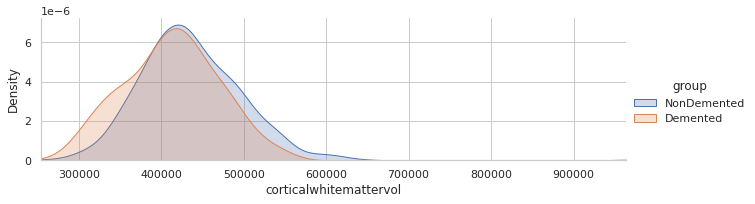

In [34]:
#'CorticalWhiteMatterVol'
facet= sns.FacetGrid(df,hue="group", aspect=3)
facet.map(sns.kdeplot,'corticalwhitemattervol',shade= True)
facet.set(xlim=(df['corticalwhitemattervol'].min(), df['corticalwhitemattervol'].max()))
facet.add_legend()
#most of the severe demented are having less volume than others.

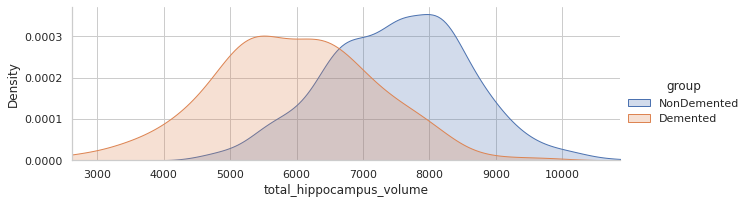

In [35]:
#'TOTAL_HIPPOCAMPUS_VOLUME'

facet= sns.FacetGrid(df,hue="group", aspect=3)
facet.map(sns.kdeplot,'total_hippocampus_volume',shade= True)
facet.set(xlim=(df['total_hippocampus_volume'].min(), df['total_hippocampus_volume'].max()))
facet.add_legend()

#below it is shown very clearly the people with some dementia have lower hippocampus volume than the normal one. 

Text(0.5, 1.0, 'CDR and MMSE')

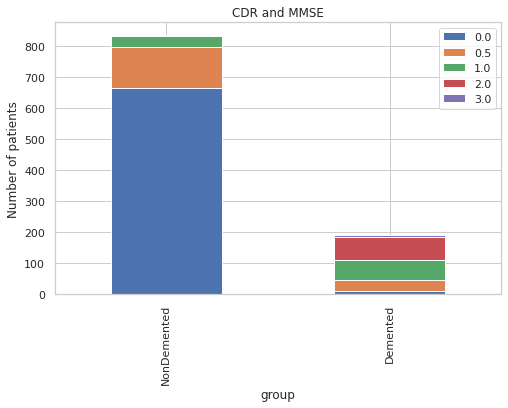

In [36]:
#'CDR'
bar_chart('cdr')
plt.xlabel('group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('CDR and MMSE')

#we can see distribution of cdr values across group.

Text(0.5, 1.0, 'Race and Demented rate')

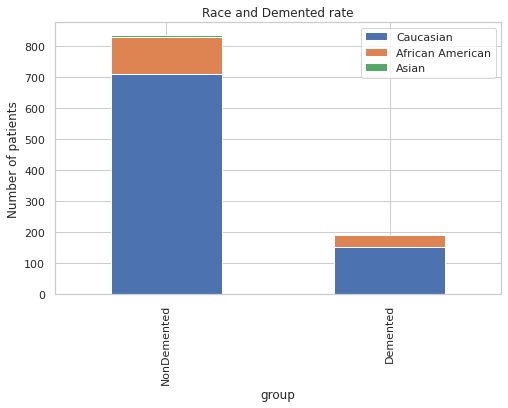

In [37]:
# Race and  Group ( Female=0, Male=1)
bar_chart('race')
plt.xlabel('group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Race and Demented rate')
#below we can see the people races and group distribution in data.

### TRYING DIFFERENT SAMPLING TECHIQUES 


CHANGING THE GROUP COLUMN AS DEMENTED=1. NONDEMENTED=0

In [38]:
df['group'].replace({'Demented':1,'NonDemented':0},inplace=True)

In [39]:
df.head()

,intracranialvol,cortexvol,totalgrayvol,corticalwhitemattervol,total_hippocampus_volume,mmse,group,cdr,apoe,age,education,race,m/f
0,1136503.981,379446.1801,517683.1801,367262.9335,7678.9,29,0,0.0,23.0,65.50,12.0,Caucasian,F
1,1727245.999,471180.9506,628934.9506,511207.5550,8860.3,29,0,0.0,34.0,68.99,18.0,Caucasian,M
2,1449811.052,421337.4069,569622.4069,455826.0555,8448.5,30,0,0.0,33.0,60.30,16.0,Caucasian,F
3,1441778.886,436061.6281,585563.6281,472832.0577,8636.3,30,0,0.0,23.0,58.11,17.0,Caucasian,F
4,1606336.367,472022.8105,670640.2598,509406.4844,9073.5,27,0,0.0,33.0,48.42,16.0,Asian,F


In [40]:
df['m/f'].replace({'F':1,'M':0},inplace=True)

In [41]:
df.head()

,intracranialvol,cortexvol,totalgrayvol,corticalwhitemattervol,total_hippocampus_volume,mmse,group,cdr,apoe,age,education,race,m/f
0,1136503.981,379446.1801,517683.1801,367262.9335,7678.9,29,0,0.0,23.0,65.50,12.0,Caucasian,1
1,1727245.999,471180.9506,628934.9506,511207.5550,8860.3,29,0,0.0,34.0,68.99,18.0,Caucasian,0
2,1449811.052,421337.4069,569622.4069,455826.0555,8448.5,30,0,0.0,33.0,60.30,16.0,Caucasian,1
3,1441778.886,436061.6281,585563.6281,472832.0577,8636.3,30,0,0.0,23.0,58.11,17.0,Caucasian,1
4,1606336.367,472022.8105,670640.2598,509406.4844,9073.5,27,0,0.0,33.0,48.42,16.0,Asian,1


## One hot encoding for categorical column

In [42]:
df = pd.get_dummies(df, columns = ['race'])

In [43]:
df.head()

,intracranialvol,cortexvol,totalgrayvol,corticalwhitemattervol,total_hippocampus_volume,mmse,group,cdr,apoe,age,education,m/f,race_African American,race_Asian,race_Caucasian
0,1136503.981,379446.1801,517683.1801,367262.9335,7678.9,29,0,0.0,23.0,65.50,12.0,1,0,0,1
1,1727245.999,471180.9506,628934.9506,511207.5550,8860.3,29,0,0.0,34.0,68.99,18.0,0,0,0,1
2,1449811.052,421337.4069,569622.4069,455826.0555,8448.5,30,0,0.0,33.0,60.30,16.0,1,0,0,1
3,1441778.886,436061.6281,585563.6281,472832.0577,8636.3,30,0,0.0,23.0,58.11,17.0,1,0,0,1
4,1606336.367,472022.8105,670640.2598,509406.4844,9073.5,27,0,0.0,33.0,48.42,16.0,1,0,1,0


Point to note - Most of the subjects are caucasians so the predicted values in the end will work better with Caucaian race as the sample have majority of caucasian subjects.

## Standardizing the columns:-

In [44]:
cols_to_scale = ['intracranialvol','cortexvol','totalgrayvol','corticalwhitemattervol','total_hippocampus_volume','mmse','cdr','apoe','age','education']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

After Standardization-

In [45]:
df.head()

,intracranialvol,cortexvol,totalgrayvol,corticalwhitemattervol,total_hippocampus_volume,mmse,group,cdr,apoe,age,education,m/f,race_African American,race_Asian,race_Caucasian
0,0.111421,0.487510,0.372655,0.159824,0.613154,0.965517,0,0.0,0.045455,0.419467,0.227273,1,0,0,1
1,0.593887,0.756005,0.661793,0.362635,0.756272,0.965517,0,0.0,0.545455,0.483563,0.500000,0,0,0,1
2,0.367302,0.610120,0.507643,0.284605,0.706385,1.000000,0,0.0,0.500000,0.323967,0.409091,1,0,0,1
3,0.360742,0.653216,0.549073,0.308566,0.729136,1.000000,0,0.0,0.045455,0.283747,0.454545,1,0,0,1
4,0.495138,0.758469,0.770183,0.360098,0.782100,0.896552,0,0.0,0.500000,0.105785,0.409091,1,0,1,0


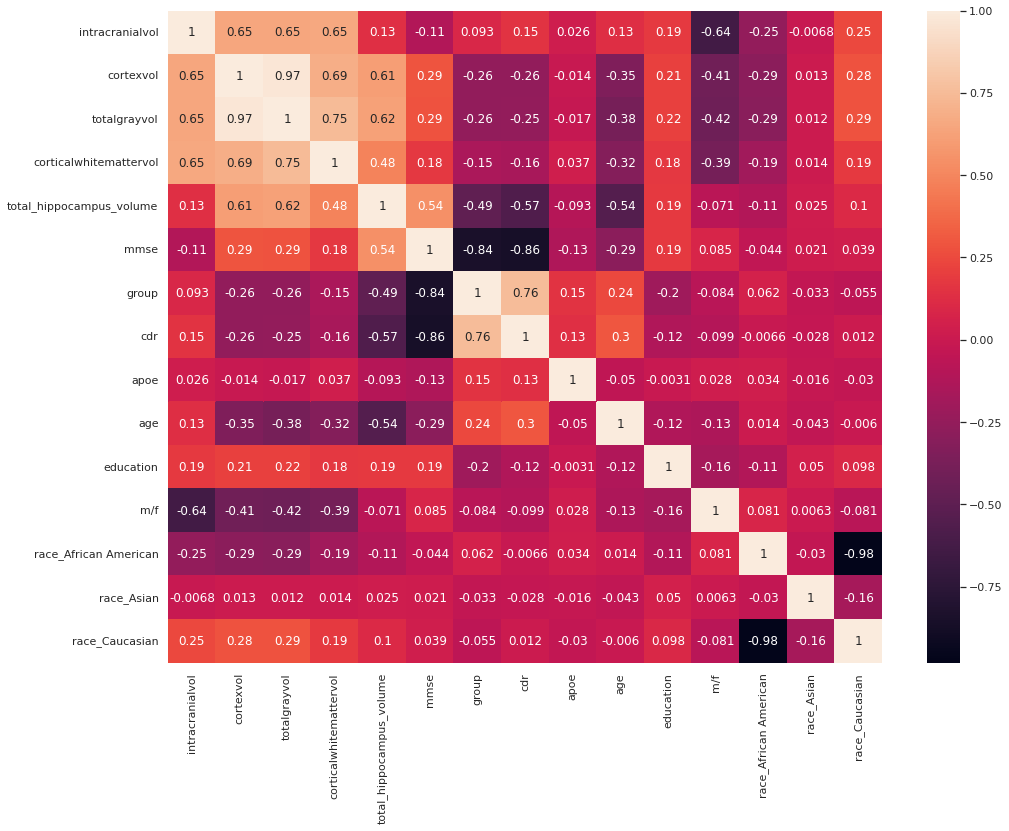

In [46]:
#Heatmap
cor = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(cor, xticklabels=cor.columns.values,yticklabels=cor.columns.values, annot=True)
plt.show()

In [47]:
df.shape

(1026, 15)

In [48]:
df.dtypes

intracranialvol             float64
cortexvol                   float64
totalgrayvol                float64
corticalwhitemattervol      float64
total_hippocampus_volume    float64
mmse                        float64
group                         int64
cdr                         float64
apoe                        float64
age                         float64
education                   float64
m/f                           int64
race_African American         uint8
race_Asian                    uint8
race_Caucasian                uint8
dtype: object

### Model

In [50]:
X = df.drop('group',axis='columns')
y = df['group']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [52]:
#shapes of training and test datasets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 14)
(257, 14)
(769,)
(257,)


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## **Logistic Regression on imbalanced classes**

In [54]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [55]:
test_score = lr.score(X_test, y_test)

print("Test accuracy is ", test_score)

PredictedOutput = lr.predict(X_test)

print("Classification Report: \n", classification_report(y_test, PredictedOutput))

Test accuracy is  0.9455252918287937
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       209
           1       0.95      0.75      0.84        48

    accuracy                           0.95       257
   macro avg       0.95      0.87      0.90       257
weighted avg       0.95      0.95      0.94       257



In [56]:
cm=confusion_matrix(y_test,PredictedOutput)
print(cm)

[[207   2]
 [ 12  36]]


In [57]:
# Class count
count_class_0, count_class_1 = df.group.value_counts()
print(count_class_0,count_class_1)


836 190


In [58]:
# Divide by class
df_class_0 = df[df['group'] == 0]
df_class_1 = df[df['group'] == 1]

UNDERSAMPLING

In [59]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.group.value_counts())

Random under-sampling:
0    190
1    190
Name: group, dtype: int64


In [60]:
X = df_test_under.drop('group',axis='columns')
y = df_test_under['group']

In [61]:
X.head()

,intracranialvol,cortexvol,totalgrayvol,corticalwhitemattervol,total_hippocampus_volume,mmse,cdr,apoe,age,education,m/f,race_African American,race_Asian,race_Caucasian
212,0.229528,0.536513,0.382837,0.307655,0.721189,1.000000,0.0,0.500000,0.411754,0.363636,1,0,0,1
555,0.455094,0.799415,0.675816,0.324306,0.867045,1.000000,0.0,0.545455,0.228834,0.500000,1,0,0,1
537,0.357040,0.525842,0.419781,0.156156,0.545326,0.965517,0.0,0.500000,0.813590,0.363636,1,0,0,1
502,0.363770,0.516093,0.378370,0.247029,0.508462,0.931034,0.0,0.500000,0.691460,0.409091,1,0,0,1
933,0.275649,0.391637,0.298137,0.190355,0.604129,0.965517,0.0,0.500000,0.468687,0.409091,1,1,0,0


In [62]:
y.head()

212    0
555    0
537    0
502    0
933    0
Name: group, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [64]:
# Number of classes in training Data
y_train.value_counts()

1    143
0    142
Name: group, dtype: int64

In [65]:
#shapes of training and test datasets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(285, 14)
(95, 14)
(285,)
(95,)


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report


## **Logistic Regression w/Undersampling**

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [69]:
test_score = lr.score(X_test, y_test)

print("Test accuracy is ", test_score)

PredictedOutput = lr.predict(X_test)

print("Classification Report: \n", classification_report(y_test, PredictedOutput))   

Test accuracy is  0.9157894736842105
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        48
           1       0.91      0.91      0.91        47

    accuracy                           0.92        95
   macro avg       0.92      0.92      0.92        95
weighted avg       0.92      0.92      0.92        95



In [70]:
cm=confusion_matrix(y_test,PredictedOutput)
print(cm)

[[44  4]
 [ 4 43]]


## Oversampling

In [71]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.group.value_counts())

Random over-sampling:
0    836
1    836
Name: group, dtype: int64


In [72]:
X = df_test_over.drop('group',axis='columns')
y = df_test_over['group']

In [73]:
X.head()

,intracranialvol,cortexvol,totalgrayvol,corticalwhitemattervol,total_hippocampus_volume,mmse,cdr,apoe,age,education,m/f,race_African American,race_Asian,race_Caucasian
0,0.111421,0.487510,0.372655,0.159824,0.613154,0.965517,0.0,0.045455,0.419467,0.227273,1,0,0,1
1,0.593887,0.756005,0.661793,0.362635,0.756272,0.965517,0.0,0.545455,0.483563,0.500000,0,0,0,1
2,0.367302,0.610120,0.507643,0.284605,0.706385,1.000000,0.0,0.500000,0.323967,0.409091,1,0,0,1
3,0.360742,0.653216,0.549073,0.308566,0.729136,1.000000,0.0,0.045455,0.283747,0.454545,1,0,0,1
4,0.495138,0.758469,0.770183,0.360098,0.782100,0.896552,0.0,0.500000,0.105785,0.409091,1,0,1,0


In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: group, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [76]:
# Number of classes in training Data
y_train.value_counts()

0    627
1    627
Name: group, dtype: int64

In [77]:
#shapes of training and test datasets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1254, 14)
(418, 14)
(1254,)
(418,)


## Logistic Regression W/Oversampling

In [78]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [79]:
test_score = lr.score(X_test, y_test)

print("Test accuracy is ", test_score)

PredictedOutput = lr.predict(X_test)

print("Classification Report: \n", classification_report(y_test, PredictedOutput))   

Test accuracy is  0.9521531100478469
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       209
           1       0.97      0.93      0.95       209

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [80]:
cm=confusion_matrix(y_test,PredictedOutput)
print(cm)

[[204   5]
 [ 15 194]]
